In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from dp_accounting.pld.privacy_loss_distribution import from_gaussian_mechanism, from_discrete_gaussian_mechanism
from gdpnum import PLDConverter
from gdpnum.converter import gaussian_fdp

# Figure 4a: De et al. Tradeoff Curve

In [2]:
sigma = 9.4
sample_rate = 2**14 / 50_000
steps = 2_000

pld = from_gaussian_mechanism(
        standard_deviation=sigma,
        sampling_prob=sample_rate,
        use_connect_dots=True,
        value_discretization_interval= 1e-3,
    ).self_compose(steps)

converter = PLDConverter(pld)


mu, regret = converter.get_mu_and_regret(err = 1e-10)

input_alphas = np.linspace(0,1,500)
betas = converter.get_beta(input_alphas)

betas_gdp = gaussian_fdp(mu)(input_alphas)

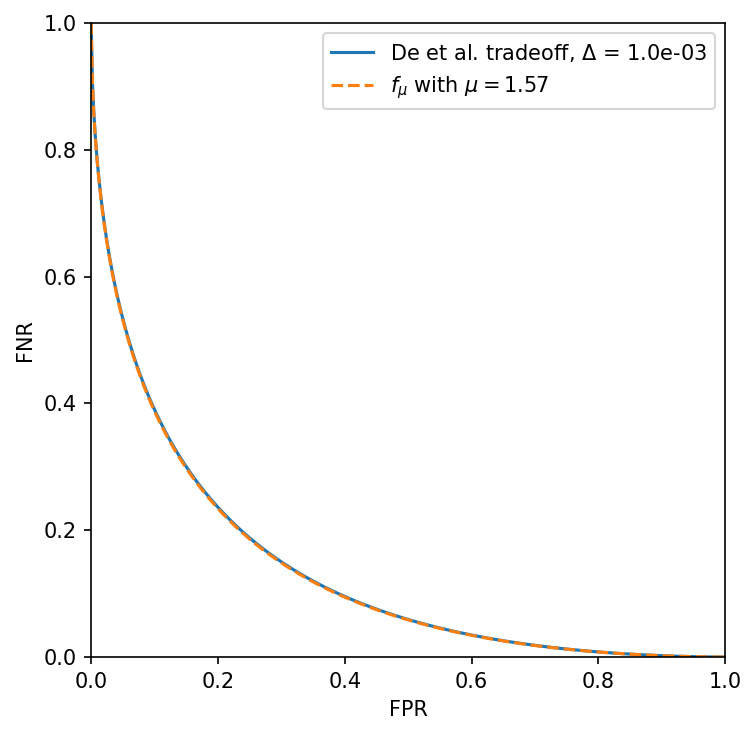

In [3]:
plt.figure(figsize = (6,5), dpi = 150)
plt.axis("square")

plt.plot(input_alphas, betas, label = fr'De et al. tradeoff, $\Delta$ = {regret:0.1e}')
plt.plot(input_alphas, betas_gdp, linestyle = '--', label = fr'$f_\mu$ with $\mu = ${mu:0.3}')

plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r"FPR")
plt.ylabel(r"FNR")
plt.tight_layout()

plt.show()

# Figure 4b: Top Down Tradeoff Curve

In [4]:
levels = ['US', 'State', 'County', 'PEPG', 'Track Subset Group', 'Track Subset', 'Block Group', 'Block']
a = np.array([2, 27.4, 8.5, 13.1, 13.1, 23.8, 11.8, 0.3]) / 100
compositions = 10
total_rho = 3.65

sigmas = np.sqrt(compositions / (2 * a * total_rho))

sigma = sigmas[0]
pld_lst = []
pld = from_discrete_gaussian_mechanism(
            sigma = sigma,
            value_discretization_interval=1e-3,
            use_connect_dots = True
        ).self_compose(compositions)
pld_lst.append(pld)

for index in range(1, len(sigmas)):
    new_pld = from_discrete_gaussian_mechanism(
            sigma = sigmas[index],
            value_discretization_interval=1e-3,
            use_connect_dots = True
        ).self_compose(compositions)
    pld_lst.append(new_pld)
    pld = pld.compose(new_pld)

converter = PLDConverter(pld)

mu, regret = converter.get_mu_and_regret(err = 1e-10)

input_alphas = np.linspace(0, 1, 500)
betas = converter.get_beta(input_alphas)

betas_gdp = gaussian_fdp(mu)(input_alphas)

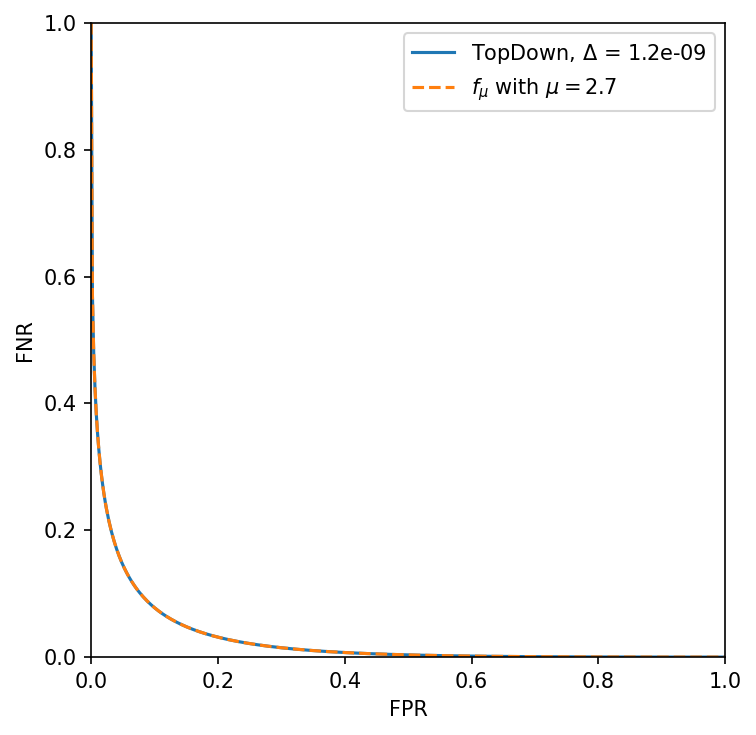

In [5]:
plt.figure(figsize = (6,5), dpi = 150)
plt.axis("square")

plt.plot(input_alphas, betas, label = fr'TopDown, $\Delta$ = {regret:0.1e}')
plt.plot(input_alphas, betas_gdp, linestyle = '--', label = fr'$f_\mu$ with $\mu = ${mu:0.3}')

plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r"FPR")
plt.ylabel(r"FNR")
plt.tight_layout()

plt.show()